##### This is a traing project by which doing data analysis tasks 
##### -------------------------------------------------------------------
##### Data is about Netflix shows 
##### Dataset source :- https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Data_Bases/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##### Task 1: Countthe number of shows added per day

In [5]:
df.date_added = pd.to_datetime(df.date_added)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [8]:
#Numper of movies add every day 
Movies_per_day = df[df['type']=='Movie'].groupby('date_added')[['show_id']].count().sort_index()
Movies_per_day.rename({'show_id':'Movies_count'},axis='columns',inplace=True)
Movies_per_day

,Movies_count
date_added,
2008-01-01,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
2011-05-17,1
...,...
2021-01-12,2
2021-01-13,1
2021-01-14,2


In [9]:
#Numper of TV Shows add every day 
TV_Shows_per_day = df[df['type']=='TV Show'].groupby('date_added')[['show_id']].count().sort_index()
TV_Shows_per_day.rename({'show_id':'TV_Shows_count'},axis='columns',inplace=True)
TV_Shows_per_day

,TV_Shows_count
date_added,
2008-02-04,1
2013-03-31,1
2013-08-02,1
2013-09-01,1
2013-10-08,1
...,...
2021-01-06,1
2021-01-08,5
2021-01-12,1


In [10]:
#total numper of addes per day 
Total_adds_per_day = df.groupby('date_added')[['show_id']].count().sort_index()
Total_adds_per_day.rename({'show_id':'Total_count'},axis='columns',inplace=True)
Total_adds_per_day

,Total_count
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-01-12,3
2021-01-13,2
2021-01-14,2


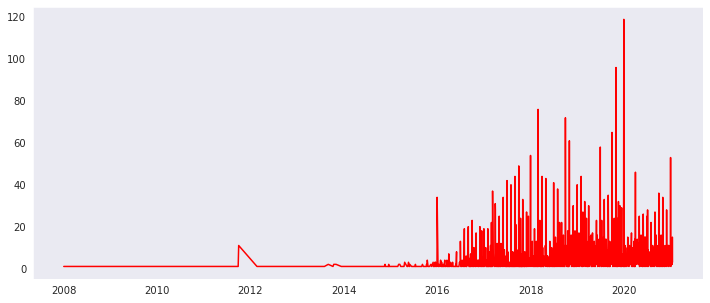

In [11]:
#ploting the results 
sns.set_style('dark')
plt.figure(figsize=(12,5))
plt.plot(Total_adds_per_day,color='r')
plt.show()

##### Task 2: Extract the day name and sum-up the shows added

In [12]:
#total adds for each day of week (DOW)
d_df = df.copy()

d_df.set_index(df.date_added,inplace=True)
d_df.index=d_df.index.day_name()

d_df['Day'] = d_df.index
Total_adds_per_DOW=d_df.groupby('Day')['show_id'].count()

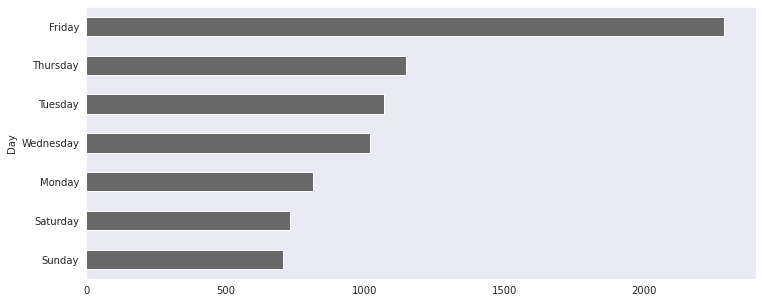

In [13]:
plt.figure(figsize=(12,5))
Total_adds_per_DOW.sort_values().plot.barh(color='dimgray')
plt.show()

##### Task 3: Select data from 2016 onwards 

In [14]:
added2016 = df[(df.date_added >= '2016-01-01')]

In [15]:
added2016.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4117,s4118,Movie,Minnaminugu the FireFly,Anil Thomas,"Surabhi Lakshmi, Krishnan Balakrishnan, Rebecc...",India,2018-08-01,2017,TV-14,128 min,"Dramas, International Movies",A nameless widow juggles multiple jobs to supp...
7604,s7605,Movie,Whitney Cummings: Money Shot,John Fortenberry,Whitney Cummings,United States,2019-01-01,2010,TV-MA,48 min,Stand-Up Comedy,Comedy Central roast veteran Whitney Cummings ...
2613,s2614,Movie,Happy New Year,Farah Khan,"Shah Rukh Khan, Deepika Padukone, Abhishek Bac...",India,2017-02-01,2014,TV-14,179 min,"Action & Adventure, Comedies, Dramas",A revenge-seeking diamond thief gathers a ragt...
505,s506,Movie,And Breathe Normally,Ísold Uggadóttir,"Kristín Thóra Haraldsdóttir, Babetida Sadjo...","Iceland, Sweden, Belgium",2019-01-04,2018,TV-14,102 min,"Dramas, Independent Movies, International Movies",An Icelandic single mom struggling with povert...
5055,s5056,Movie,Rachel Getting Married,Jonathan Demme,"Anne Hathaway, Rosemarie DeWitt, Debra Winger,...",United States,2019-09-01,2008,R,113 min,"Dramas, Independent Movies",Longstanding family conflicts resurface when a...


In [16]:
#added per each week starting from 2016 ~ 2021
added2016.set_index('date_added',inplace=True)

In [17]:
weekly_from2016 = added2016[['show_id']].resample('W').count()

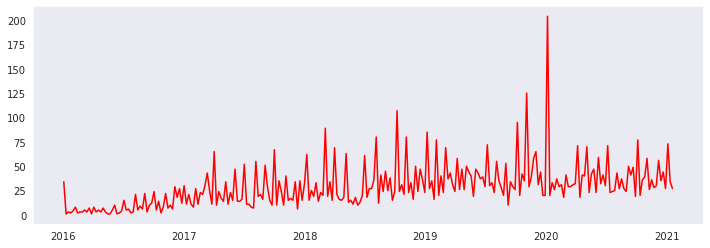

In [18]:
#ploting the results
plt.figure(figsize=(12,4))
plt.plot(weekly_from2016,color='r')
plt.show()